# Thesis Notebook Caro Pe

## Imports

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import numpy as np
import seaborn as sns

## CSV files input to the Notebook

In [281]:
#Stuttgart Bikes Sets
stuttgart_dataset = "./stuttgart_bikes.csv"
df_stuttgart = pd.read_csv(stuttgart_dataset)

# df_stuttgart.shape: (10,12)
df_stuttgart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   jahr                      10 non-null     int64
 1   total_bikes_both_streets  10 non-null     int64
 2   total_bikes_street_1      10 non-null     int64
 3   spring_street_1           10 non-null     int64
 4   summer_street_1           10 non-null     int64
 5   fall_street_1             10 non-null     int64
 6   winter_street_1           10 non-null     int64
 7   total_bikes_street_2      10 non-null     int64
 8   spring_street_2           10 non-null     int64
 9   summer_street_2           10 non-null     int64
 10  fall_street_2             10 non-null     int64
 11  winter_street_2           10 non-null     int64
dtypes: int64(12)
memory usage: 1.1 KB


## Stuttgart Data Set Analysis

#### Plotting Stuttgart Dataset Information

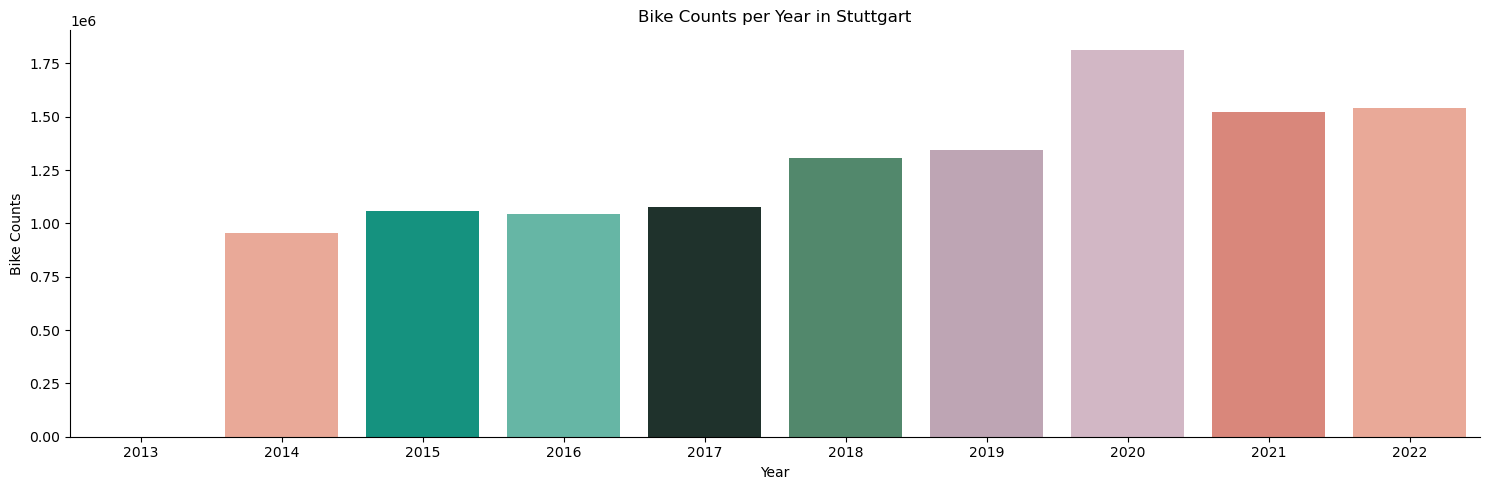

In [282]:
base_colors = ['#e97c6b', '#f7a18a', '#00a78d', '#59c3ad', '#1c352d', '#49916b', '#c2a1b5', '#d6b3c5']

with sns.color_palette(base_colors):
    #sns.set_palette(base_colors)
    sns.catplot(data=df_stuttgart, x='jahr', y='total_bikes_both_streets', kind='bar', aspect=3,palette=base_colors)
plt.title('Bike Counts per Year in Stuttgart')
plt.xlabel('Year')
plt.ylabel('Bike Counts')
plt.tight_layout()
plt.show()

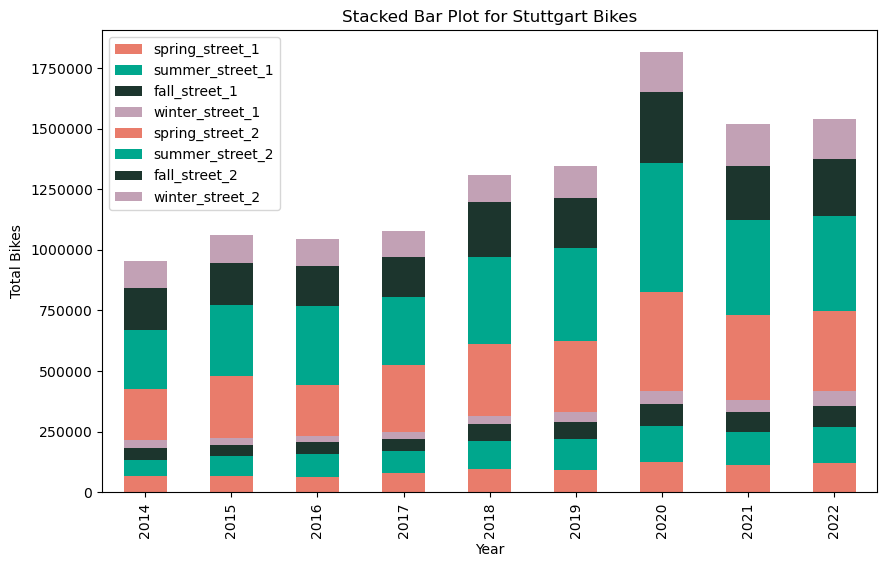

In [283]:
df_stuttgart = df_stuttgart.drop(columns=['total_bikes_both_streets','total_bikes_street_1','total_bikes_street_2'])

# Drop rows where the value in the "jahr" column is 2013, because it has no values for the "street 1" related columns
# it seems like there was no sensor in that street during 2013
df_stuttgart = df_stuttgart[df_stuttgart['jahr'] != 2013]

sns.color_palette("flare")
# Plotting
ax = df_stuttgart.plot.bar(x='jahr',stacked=True, figsize=(10, 6), color=['#e97c6b','#00a78d','#1c352d','#c2a1b5'])

# Change y-axis tick format
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Ensure plain formatting

# Add labels and title
plt.title('Stacked Bar Plot for Stuttgart Bikes')
plt.xlabel('Year')
plt.ylabel('Total Bikes')

# Show plot
plt.show()

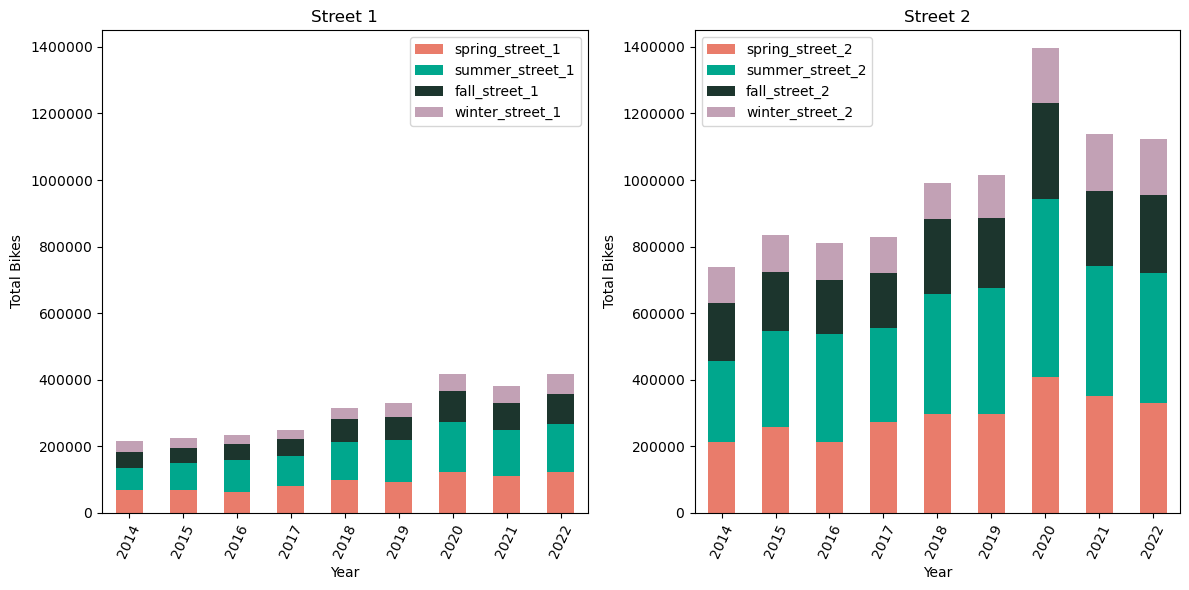

In [284]:
# Now I want to visualize the street count trend separately

fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Change y-axis tick format
axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0].ticklabel_format(style='plain', axis='y')  # Ensure plain formatting

df_stuttgart[['spring_street_1', 'summer_street_1', 'fall_street_1', 'winter_street_1']].plot(ax=axs[0], kind='bar', stacked=True, color=['#e97c6b','#00a78d','#1c352d','#c2a1b5'])
axs[0].set_title('Street 1')
axs[0].set_ylabel('Total Bikes')
axs[0].set_xlabel('Year')
axs[0].set_ylim(0,1450000)
axs[0].set_xticklabels(df_stuttgart['jahr'], rotation=65)  # Set x-axis labels

# Plot for street 2
# Change y-axis tick format
axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1].ticklabel_format(style='plain', axis='y')  # Ensure plain formatting

df_stuttgart[['spring_street_2', 'summer_street_2', 'fall_street_2', 'winter_street_2']].plot(ax=axs[1], kind='bar', stacked=True, color=['#e97c6b','#00a78d','#1c352d','#c2a1b5'])
axs[1].set_title('Street 2')
axs[1].set_ylabel('Total Bikes')
axs[1].set_xlabel('Year')
axs[1].set_ylim(0,1450000)
axs[1].set_xticklabels(df_stuttgart['jahr'], rotation=65)  # Set x-axis labels

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()